**Pressione SHIFT+ENTER para executar a célula**

# Alegrete

Este notebook fornece algumas visualizações para o trabalho de regressão linear. Para conseguir usar, implemente as funções no seu `alegrete.py` e tenha as bibliotecas `numpy` e `matplotlib` instaladas.

O notebook usa um conjunto de dados sintetico. Adapte-o para carregar e usar os dados do `alegrete.csv`.

### Imports das bibliotecas de plot e da solução implementada

In [30]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import csv

import alegrete

### Visualização dos Dados

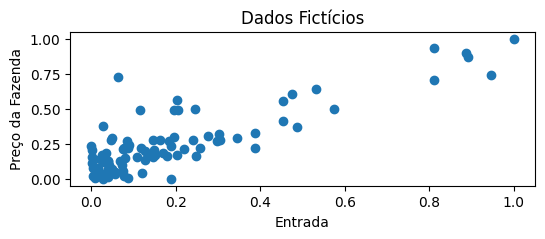

In [31]:
# Entrada do dataset alegrete.csv
with open('alegrete.csv', 'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    dataset = np.array(list(csv_reader), dtype=float)

# Normalização dos dados de treinamento
min_x = min(dataset[:,0])
min_y = min(dataset[:,1])
max_x = max(dataset[:,0])
max_y = max(dataset[:,1])
for i in range(len(dataset[:,0])):
    dataset[i,0] = (dataset[i,0] - min_x) / (max_x - min_x)
    dataset[i,1] = (dataset[i,1] - min_y) / (max_y - min_y)

# Gráfico dos dados normalizados
plt.figure(figsize=(6, 2))
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel('Entrada')
plt.ylabel('Preço da Fazenda')
plt.title('Dados Fictícios')
plt.show()

### Execução da Regressão Linear e Cálculo do EQM por Época/Iteração

Considere o parâmetro `b` o coeficiente linear ($ \theta_0 $, visto em aula) e `w` o coeficiente angular ($ \theta_1 $, visto em aula).

EQM Final: 0.014802014491336607


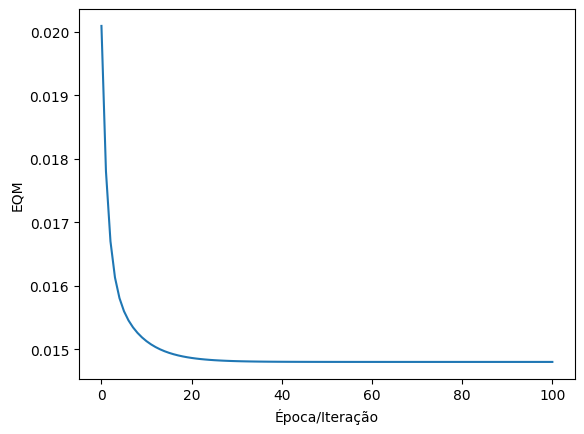

In [32]:
b_history, w_history = alegrete.fit(
    dataset, b=0, w=1,
    alpha=0.8, num_iterations=100
)

# valores finais de theta0 e theta1
final_b, final_w = b_history[-1], w_history[-1]

mse_list = [alegrete.compute_mse(b, w, dataset) for b, w in zip(b_history, w_history)]
print(f"EQM Final: {mse_list[-1]}")

plt.plot(mse_list)
plt.xlabel('Época/Iteração')
plt.ylabel('EQM')
plt.show()

### Plot da Curva Final

Curva Encontrada: 0.8301241980002404*x + 0.09376910384271459


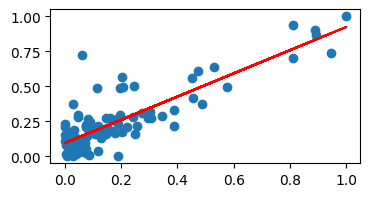

In [33]:
#Imprimir parâmetros otimizados
print (f'Curva Encontrada: {final_w}*x + {final_b}')

#plota os dados
plt.figure(figsize=(4, 2))
plt.scatter(dataset[:,0], dataset[:,1])

# plota a curva de ajuste
pred = final_w*dataset[:,0] + final_b
plt.plot(dataset[:,0], pred, c='r')
plt.show()

### Progresso da Descida do Gradiente com o Número de Iterações

Execute a célula e use os controles abaixo do gráfico para visualizar o progresso do seu ajuste.

Pode aparecer um gráfico "extra" abaixo da animação, apenas ignore.

/tmp/ipykernel_5433/1673762163.py:18: UserWarning: You passed in an explicit save_count=50 which is being ignored in favor of frames=101.
  ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)


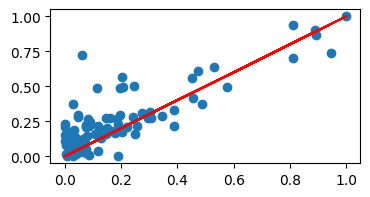

In [34]:
fig = plt.figure(figsize=(4, 2))
ax = fig.add_subplot(111)

# conjunto de dados
ax.scatter(dataset[:,0], dataset[:,1])

# linha com os valores iniciais dos parametros
pred = w_history[0]*dataset[:,0] + b_history[0]
line, = ax.plot(dataset[:,0], pred, '-',c='r')

# funcao que atualiza a linha a cada passo
def animate(i):
    pred = w_history[i] * dataset[:,0] + b_history[i]
    line.set_ydata(pred)
    return line,

# mude interval para trocar a velocidade da animacao
ani = animation.FuncAnimation(fig, animate, frames=len(b_history), interval=20, save_count=50)
HTML(ani.to_jshtml())